In [1]:
import rasterio
import os
import json
import geojson
from shapely.geometry import Polygon
import numpy as np
import gzip
import cv2
import numpy as np
import ast

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data_dir = '../data/onera/'
cities = os.listdir(data_dir)
cities.sort()

In [4]:
for city in cities:
    if '.txt' not in city:
        fin = open(data_dir + city + '/' + city + '.geojson', 'r')
        data = json.load(fin)
        fin.close()
        polygon = Polygon(data['features'][0]['geometry']['coordinates'][0])
        print (city, polygon.bounds)

abudhabi (54.540252685546875, 24.291407914292037, 54.61406707763672, 24.366488081551143)
aguasclaras (-48.049821853637695, -15.859636595173626, -48.00158500671387, -15.816368703814689)
beihai (109.4839096069336, 21.531653397583106, 109.5560073852539, 21.615940981653758)
beirut (35.46180725097656, 33.80140293756829, 35.56772232055664, 33.918149900925556)
bercy (2.35931396484375, 48.82065440440466, 2.4011993408203125, 48.86663445988588)
bordeaux (-0.6009864807128906, 44.810583121135906, -0.5508613586425781, 44.86681967562225)
brasilia (-47.90768623352051, -15.766483542885926, -47.86459922790527, -15.726748339930374)
chongqing (106.26972198486328, 29.379183431737633, 106.32225036621092, 29.449762750751052)
cupertino (-122.05372810363768, 37.29761247853017, -121.97330474853516, 37.40125554281722)
dubai (55.19376754760742, 25.0003719913183, 55.253849029541016, 25.073782645952882)
hongkong (114.22811508178711, 22.276389027850755, 114.27858352661131, 22.34134341446177)
lasvegas (-115.27233123

In [5]:
img = cv2.imread(data_dir + 'bordeaux/pair/img1.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

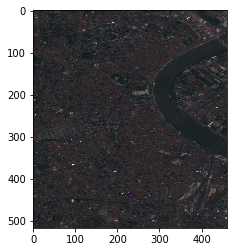

In [6]:
plt.imshow(img)

In [11]:
label_dir = '../data/onera_train_labels/'

In [12]:
data_dir = '../data/onera/'

In [8]:
features = {}

In [13]:
fin = open(data_dir + 'bercy/bercy.geojson', 'r')

for line in fin.readlines():
    data = ast.literal_eval(line)
    if data['geometry']['type'] == 'Polygon':
        polygon = Polygon(np.radians(data['geometry']['coordinates'][0]))
        if polygon.area*6370**2 * 1000**2 > 100: 
            if 'landuse' in data['properties']:
                if data['properties']['landuse'] not in features:
                    print (data['properties']['landuse'])
                    features[data['properties']['landuse']] = 1
fin.close()

KeyError: 'geometry'

In [14]:
import cv2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [16]:
color_map = {'UrbanBuilt':[255,51,51],'Road':[51,246,255],'NaturalNotWater':[255,51,206],'WaterBodies':[74,32,32],"Ambiguous":[0,0,0]}
lbl = cv2.imread(label_dir + 'abudhabi/cm/cm.png')
mask = np.zeros((lbl.shape[0],lbl.shape[1]))
mask[np.all(lbl == [0,0,0], axis=-1)] = 0
mask[np.all(lbl == [255,51,51], axis=-1)] = 1
mask[np.all(lbl == [51,246,255], axis=-1)] = 2
mask[np.all(lbl == [255,51,206], axis=-1)] = 3
mask[np.all(lbl == [74,32,32], axis=-1)] = 4


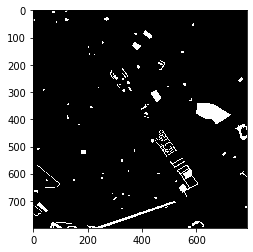

In [17]:
plt.imshow(lbl)

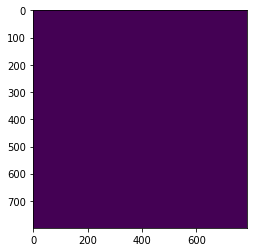

In [18]:
plt.imshow(mask * 51)